In [2]:
import scperturb as scp 
import urllib.request
import os
import scanpy as sc 
import numpy as np
from matplotlib import pyplot as plt
from gsnn_lib.proc import omnipath 
import pandas as pd
import torch

from gsnn.models.GSNN import GSNN 
from gsnn.models.NN import NN
from hnet.models.HyperNet import HyperNet

from gsnn_lib.proc.sc.load import get_SrivatsanTrapnell2020, load_scp_dataset
from gsnn_lib.data.scSampler import scSampler

from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

from hnet.train.hnet import init_hnet

import umap
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import gc 
from scipy.stats import ks_2samp, mannwhitneyu

from gsnn.ot.utils import plot_transport_plan, eval

%load_ext autoreload
%autoreload 2

/home/teddy/miniconda3/envs/gsnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
fnames = os.listdir('../sc_data/PROC/')
drugs = np.unique([f.split('_')[2] for f in fnames])[:-1] 
data = torch.load('../sc_data/' + 'data.pt')

In [4]:
res_dict = torch.load('../sc_output3/res_dict.pt')
sampler = res_dict['sampler']
#os.chdir('../')
T = res_dict['T']

if 'f' in res_dict: 
    F = res_dict['f']
else: 
    F = None 

args = res_dict['args']
device = 'cuda'

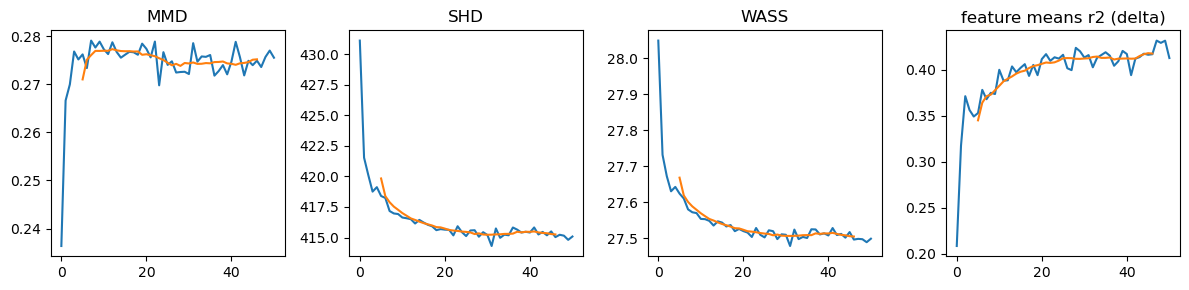

In [5]:
window = 10
xx = np.arange(window//2, len(res_dict['mmds']) - window//2 + 1)

f, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].plot(res_dict['mmds'], label='MMD')
running_mean = np.convolve(res_dict['mmds'], np.ones(window)/window, mode='valid')
axes[0].plot(xx, running_mean)
axes[0].set_title('MMD')

axes[1].plot(res_dict['shds'], label='SHD')
running_mean = np.convolve(res_dict['shds'], np.ones(window)/window, mode='valid')
axes[1].plot(xx, running_mean)
axes[1].set_title('SHD')

axes[2].plot(res_dict['wass'], label='WASS')
running_mean = np.convolve(res_dict['wass'], np.ones(window)/window, mode='valid')
axes[2].plot(xx, running_mean)
axes[2].set_title('WASS')

axes[3].plot(res_dict['mu_r2'], label='WASS')
running_mean = np.convolve(res_dict['mu_r2'], np.ones(window)/window, mode='valid')
axes[3].plot(xx, running_mean)
axes[3].set_title('feature means r2 (delta)')

plt.tight_layout()
plt.show()

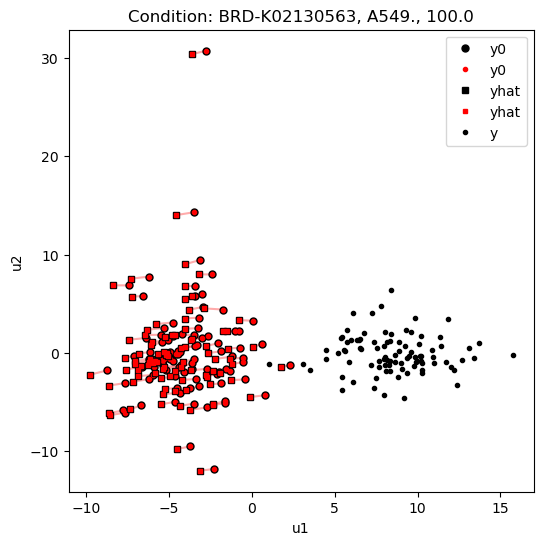

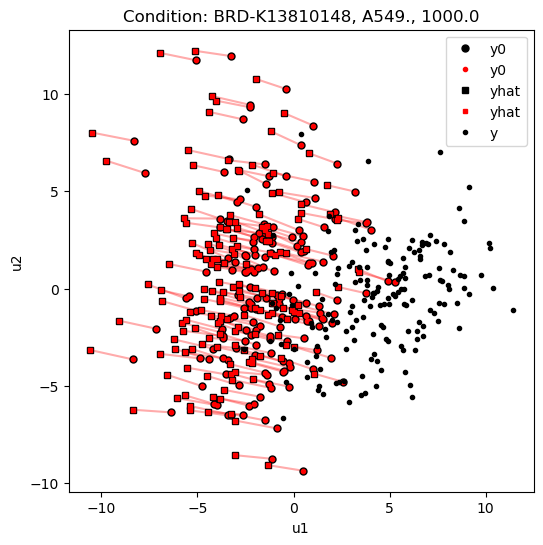

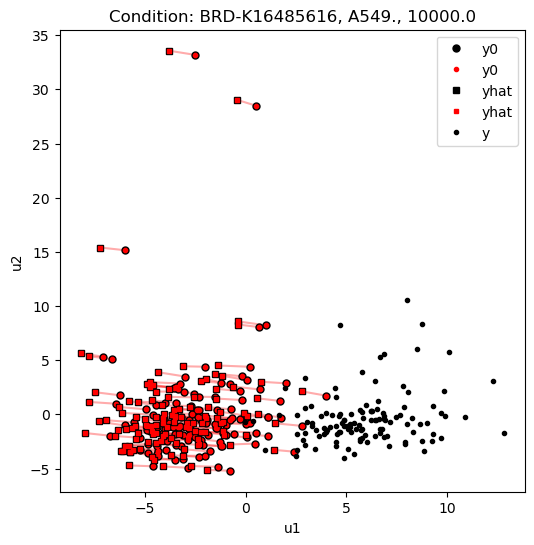

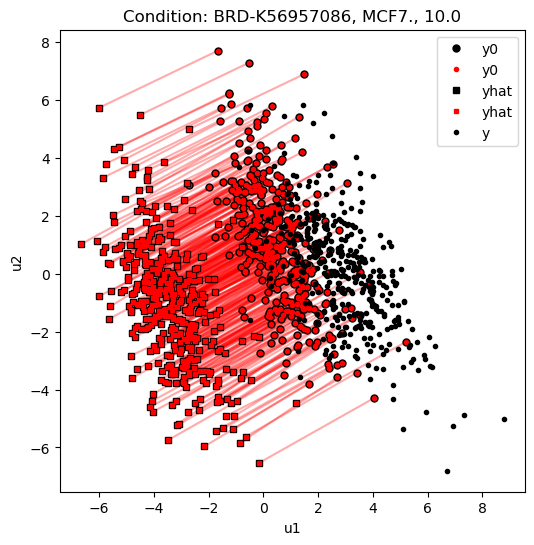

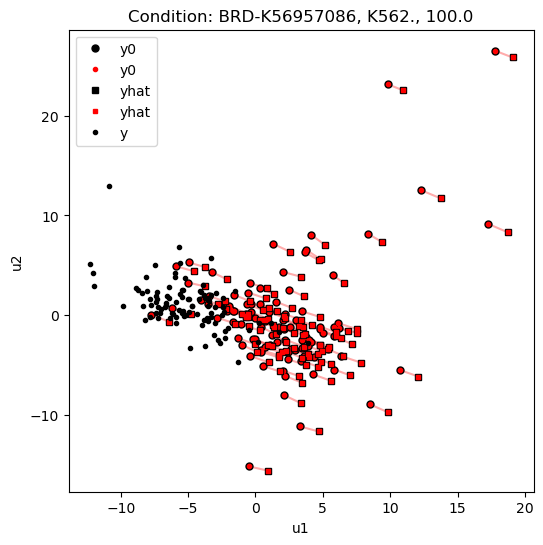

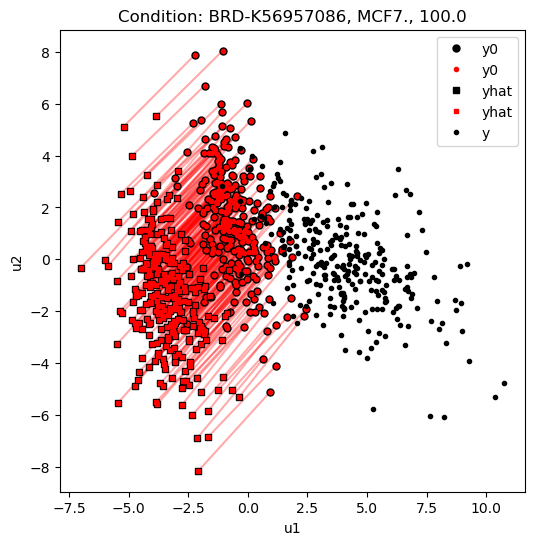

In [5]:
plot_transport_plan(sampler, T, F=F, conditions=[3,18,33,50,52,53], dim_red='pca', max_n=1000)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


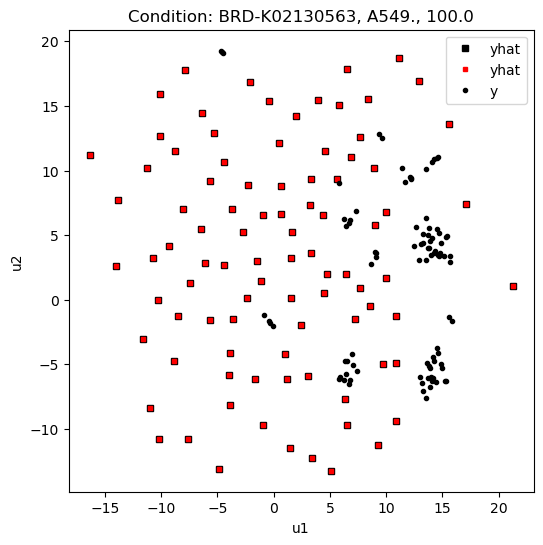

In [ ]:
plot_transport_plan(sampler, T, F=F, conditions=[3,18,33,50,52,53], dim_red='umap', max_n=1000, plot_y0=False)

In [7]:
mmds_, shds_, wass_, mu_r2 = eval(T, sampler, batch_size=32, partition='test', agg='none', max_n=500)

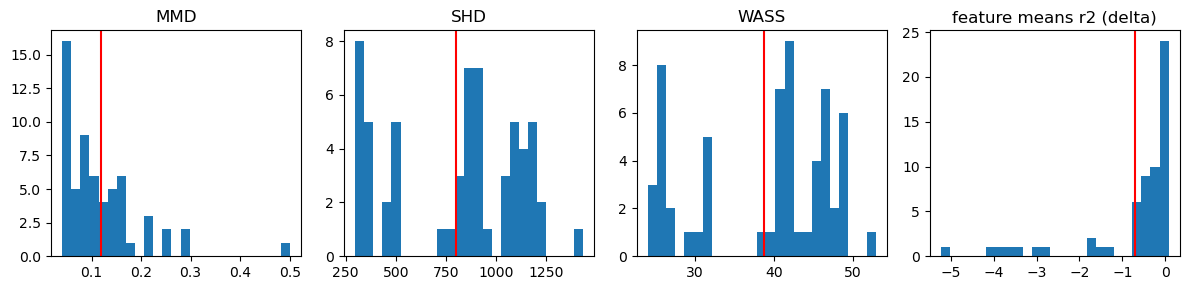

In [8]:
_bins = 25
f, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].hist(mmds_, bins=_bins)
axes[0].axvline(np.mean(mmds_), color='r')
axes[0].set_title('MMD')
axes[1].hist(shds_, bins=_bins)
axes[1].axvline(np.mean(shds_), color='r')
axes[1].set_title('SHD')
axes[2].hist(wass_, bins=_bins)
axes[2].axvline(np.mean(wass_), color='r')
axes[2].set_title('WASS')
axes[3].hist(mu_r2, bins=_bins)
axes[3].axvline(np.mean(mu_r2), color='r')
axes[3].set_title('feature means r2 (delta)')
plt.tight_layout()
plt.show()